In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
df = pd.read_csv('boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


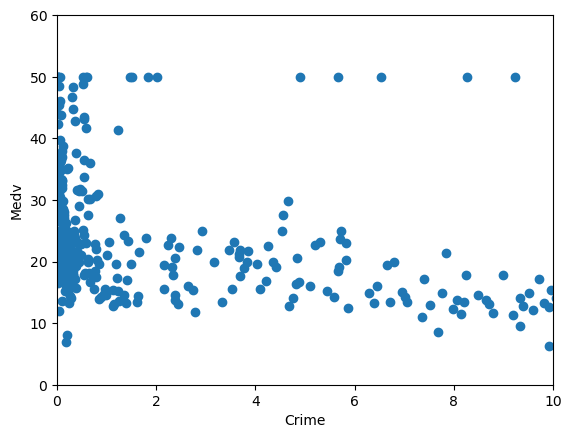

In [5]:
plt.scatter(df['crim'],df['medv'])
plt.xlabel('Crime')
plt.ylabel('Medv')
plt.axis([0,10,0,60])
plt.show()

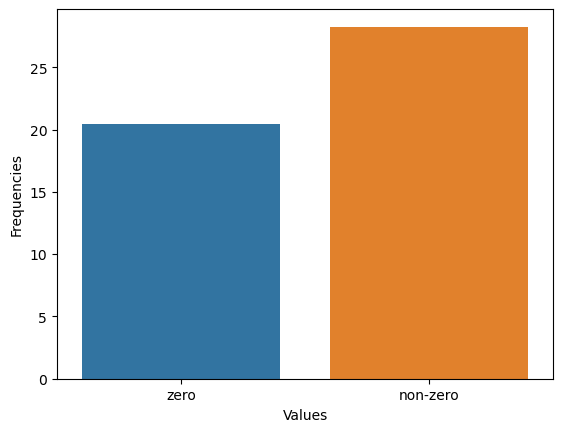

In [6]:
# plotting a bar graph for residential zoned area
values = ['zero','non-zero']
frequencies = [df[df['zn'] == 0]['medv'].mean(), df[df['zn'] != 0]['medv'].mean()]

sns.barplot(x = values,y=frequencies)
plt.xlabel('Values')
plt.ylabel('Frequencies')
plt.show()

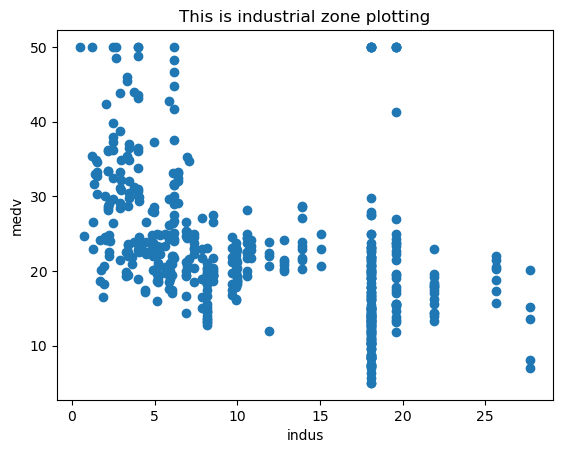

In [7]:
# industrial area analysis
plt.scatter(df['indus'],df['medv'])
plt.xlabel('indus')
plt.ylabel('medv')
plt.title('This is industrial zone plotting')
plt.show()

In [8]:
df['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

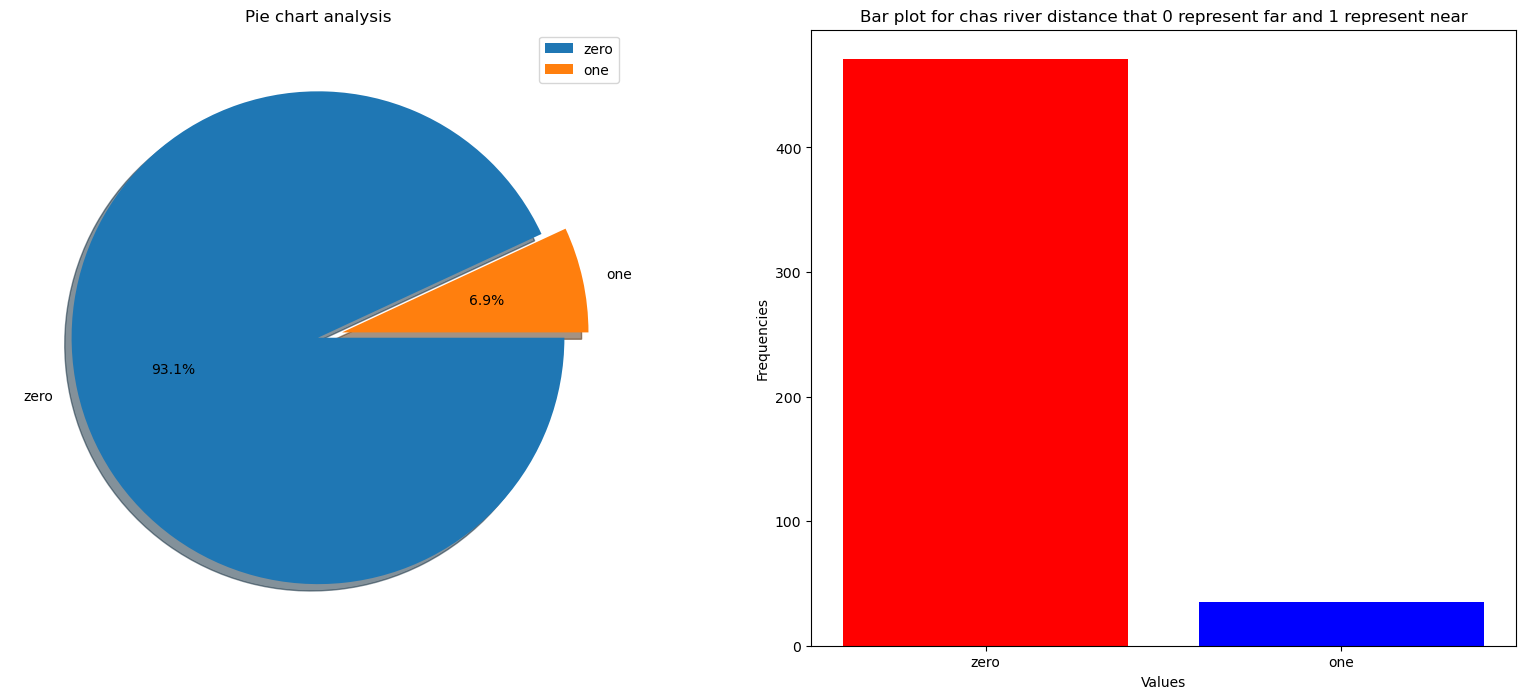

In [9]:
# chas river dummy
values = ['zero','one']
frequencies = list(df['chas'].value_counts())

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.pie(frequencies,labels=values,autopct='%1.1f%%',shadow=True,explode=[0,0.1],counterclock=False)
plt.legend()
plt.title("Pie chart analysis")

plt.subplot(1,2,2)
plt.bar(x=values,height=frequencies,color=['red','blue'])
plt.xlabel('Values')
plt.ylabel('Frequencies')
plt.title("Bar plot for chas river distance that 0 represent far and 1 represent near")

plt.show()

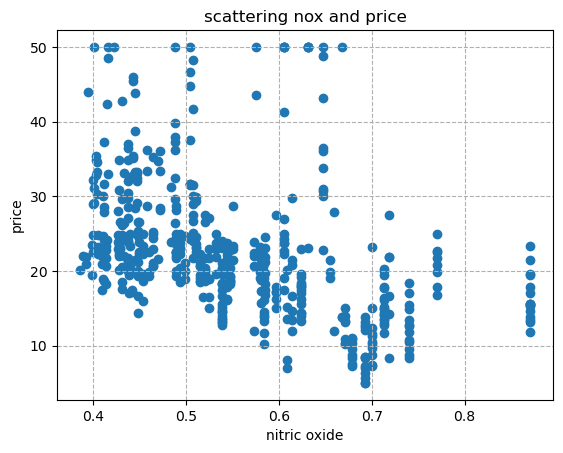

In [10]:
plt.scatter(df['nox'],df['medv'])
plt.xlabel('nitric oxide')
plt.ylabel('price')
plt.title('scattering nox and price')
plt.grid(ls='--')
plt.show()

In [11]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

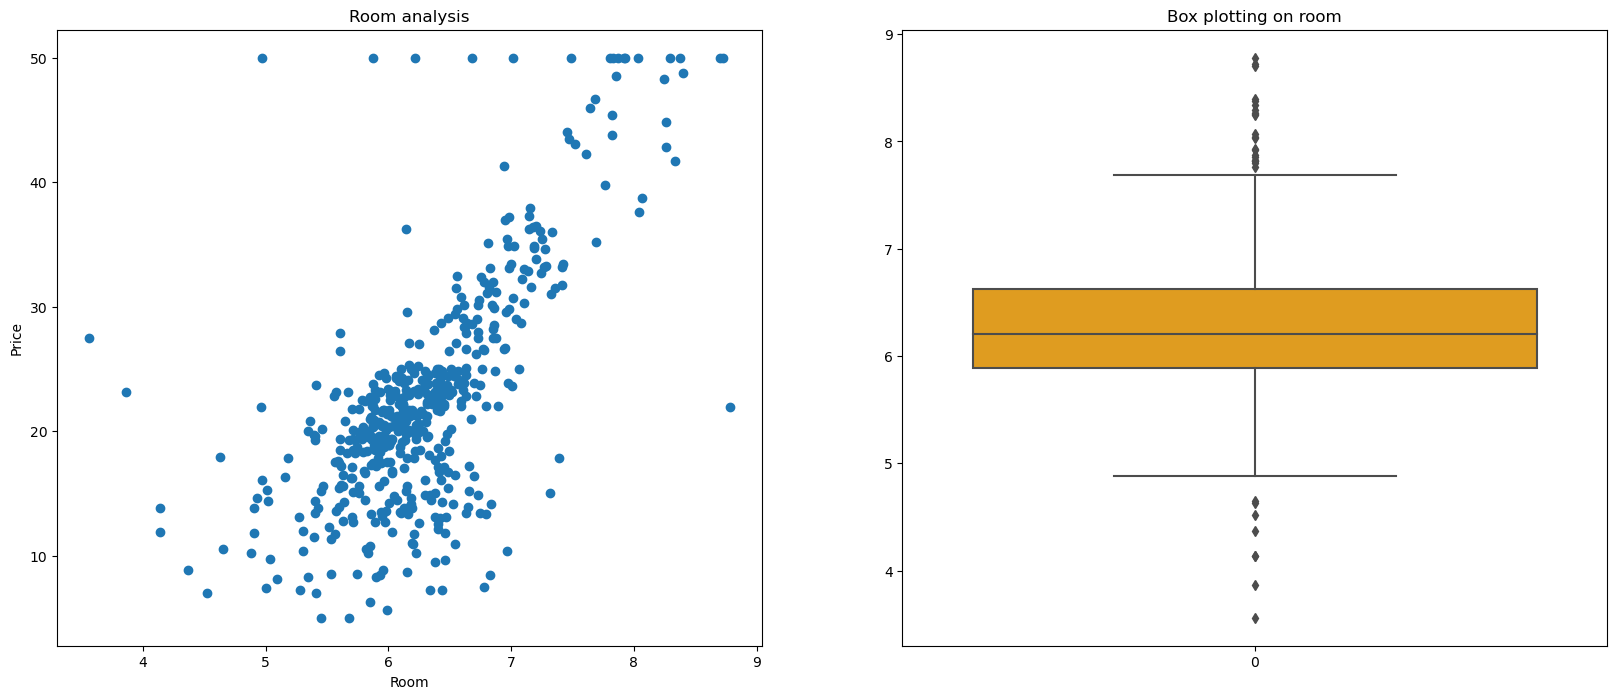

In [12]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(df['rm'],df['medv'])
plt.xlabel('Room')
plt.ylabel('Price')
plt.title('Room analysis')

plt.subplot(1,2,2)
sns.boxplot(df['rm'],color='orange')
plt.title('Box plotting on room')

plt.show()

<Axes: >

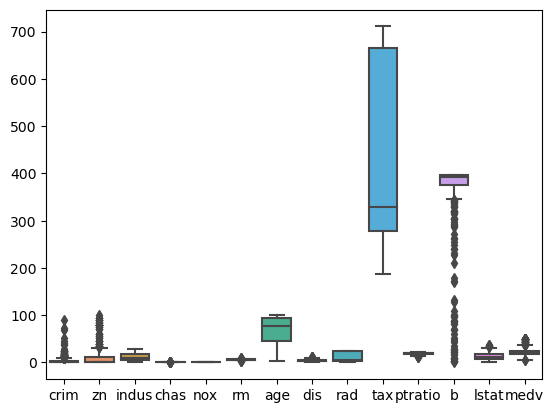

In [13]:
sns.boxplot(df)

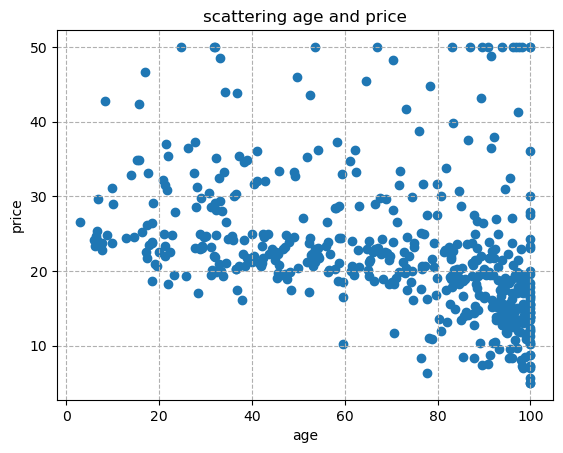

In [14]:
plt.scatter(df['age'],df['medv'])
plt.xlabel('age')
plt.ylabel('price')
plt.title('scattering age and price')
plt.grid(ls='--')
plt.show()

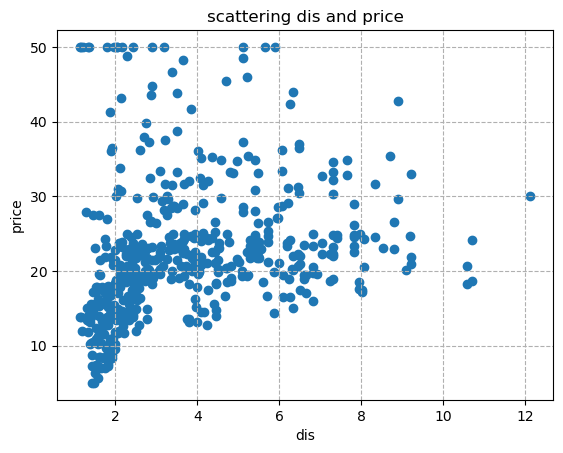

In [15]:
plt.scatter(df['dis'],df['medv'])
plt.xlabel('dis')
plt.ylabel('price')
plt.title('scattering dis and price')
plt.grid(ls='--')
plt.show()

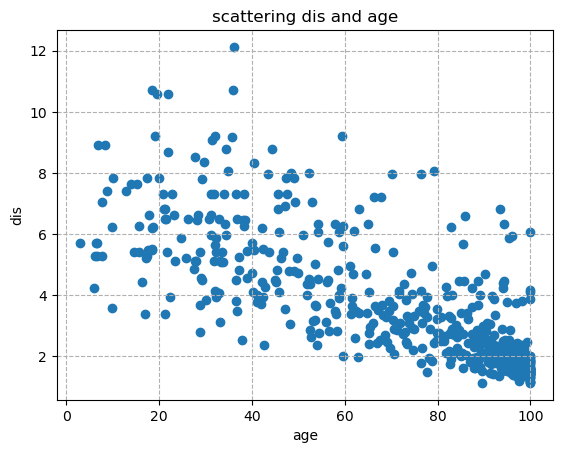

In [16]:
plt.scatter(df['age'],df['dis'])
plt.xlabel('age')
plt.ylabel('dis')
plt.title('scattering dis and age')
plt.grid(ls='--')
plt.show()

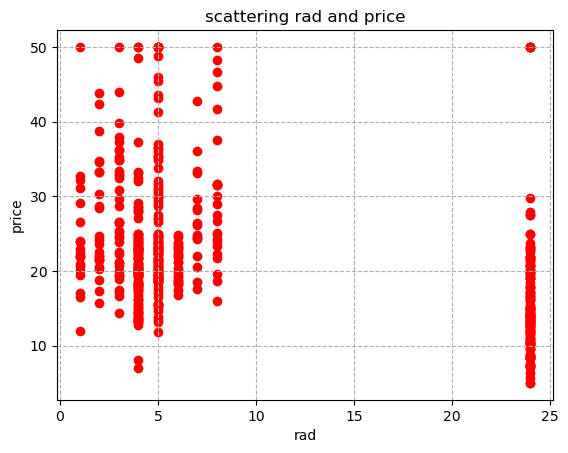

In [17]:
plt.scatter(df['rad'],df['medv'],color='red')
plt.xlabel('rad')
plt.ylabel('price')
plt.title('scattering rad and price')
plt.grid(ls='--')
plt.show()

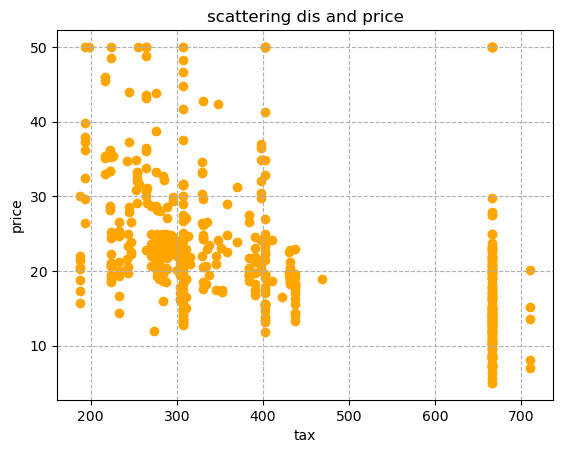

In [18]:
plt.scatter(df['tax'],df['medv'],color='orange')
plt.xlabel('tax')
plt.ylabel('price')
plt.title('scattering dis and price')
plt.grid(ls='--')
plt.show()

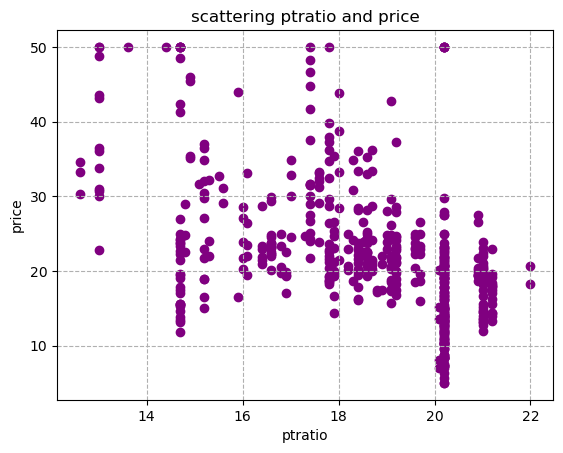

In [19]:
plt.scatter(df['ptratio'],df['medv'],color='purple')
plt.xlabel('ptratio')
plt.ylabel('price')
plt.title('scattering ptratio and price')
plt.grid(ls='--')
plt.show()

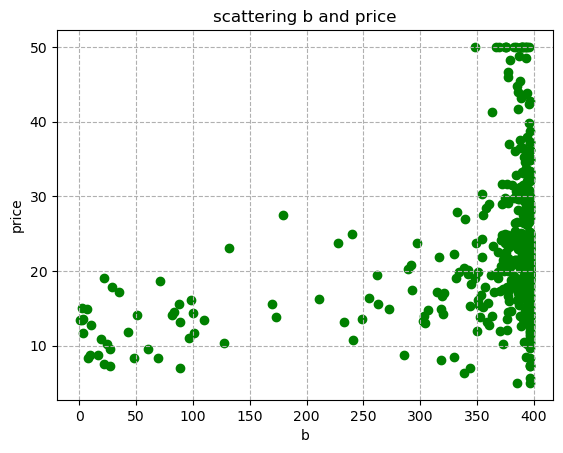

In [20]:
plt.scatter(df['b'],df['medv'],color='green')
plt.xlabel('b')
plt.ylabel('price')
plt.title('scattering b and price')
plt.grid(ls='--')
plt.show()

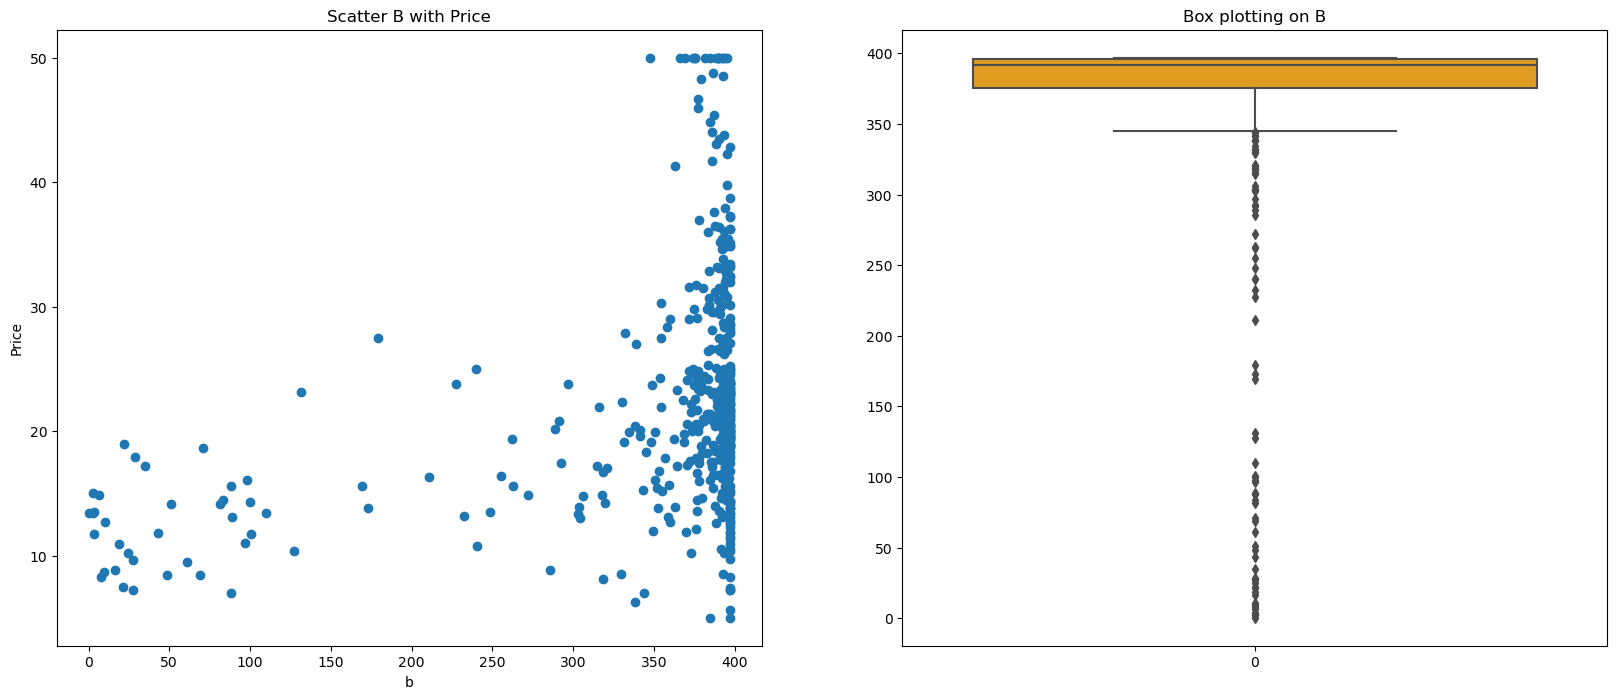

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(df['b'],df['medv'])
plt.xlabel('b')
plt.ylabel('Price')
plt.title('Scatter B with Price')

plt.subplot(1,2,2)
sns.boxplot(df['b'],color='orange')
plt.title('Box plotting on B')
plt.show()

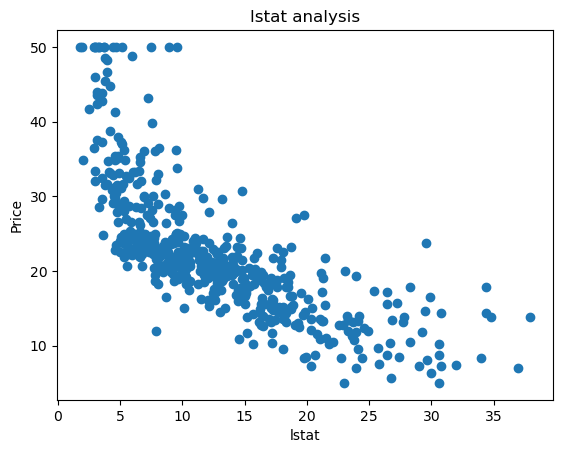

In [22]:
plt.scatter(df['lstat'],df['medv'])
plt.xlabel('lstat')
plt.ylabel('Price')
plt.title('lstat analysis')
plt.show()

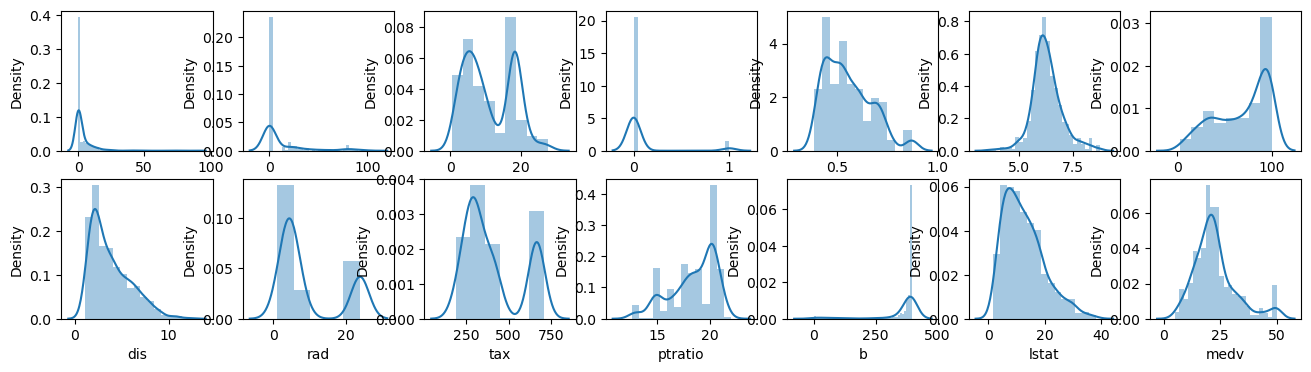

In [23]:
fig,ax = plt.subplots(nrows=2,ncols=7,figsize=(16,4))
cols = df.columns
index = 0
for i in range(2):
    for j in range(7):
        sns.distplot(df[cols[index]],ax=ax[i][j])
        index +=1

plt.show()

In [24]:
# find out the how many outliers are in the column of the dataset
for k,v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    IRQ = q3-q1
    v_col = v[( v < q1 - 1.5 * IRQ) | ( v > q3 + 1.5 * IRQ )]
    perc = np.shape(v_col)[0] * 100.0/np.shape(df)[0]
    print("Columns %s outliers: %.2f%%"%(k,perc))

Columns crim outliers: 13.04%
Columns zn outliers: 13.44%
Columns indus outliers: 0.00%
Columns chas outliers: 6.92%
Columns nox outliers: 0.00%
Columns rm outliers: 5.93%
Columns age outliers: 0.00%
Columns dis outliers: 0.99%
Columns rad outliers: 0.00%
Columns tax outliers: 0.00%
Columns ptratio outliers: 2.96%
Columns b outliers: 15.22%
Columns lstat outliers: 1.38%
Columns medv outliers: 7.91%


In [25]:
corrmat = df.corr()
corrmat

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


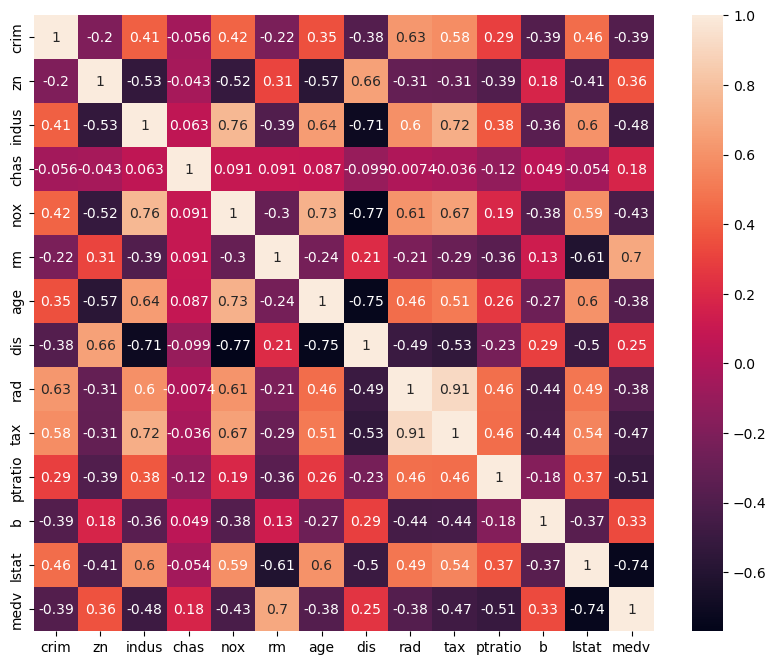

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(corrmat,annot=True)
plt.show()

In [27]:
# Threshold value
def getcorrelatedfeature(corrdata,threshold):
    feature, value = [],[]
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data=value,index=feature,columns=['corr_value'])
    return df

In [28]:
threshold = 0.50
corr_value = getcorrelatedfeature(corrmat['medv'],threshold)
corr_value

,corr_value
rm,0.695360
ptratio,-0.507787
lstat,-0.737663
medv,1.000000


In [29]:
correlated_data = df[corr_value.index]
correlated_data

,rm,ptratio,lstat,medv
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


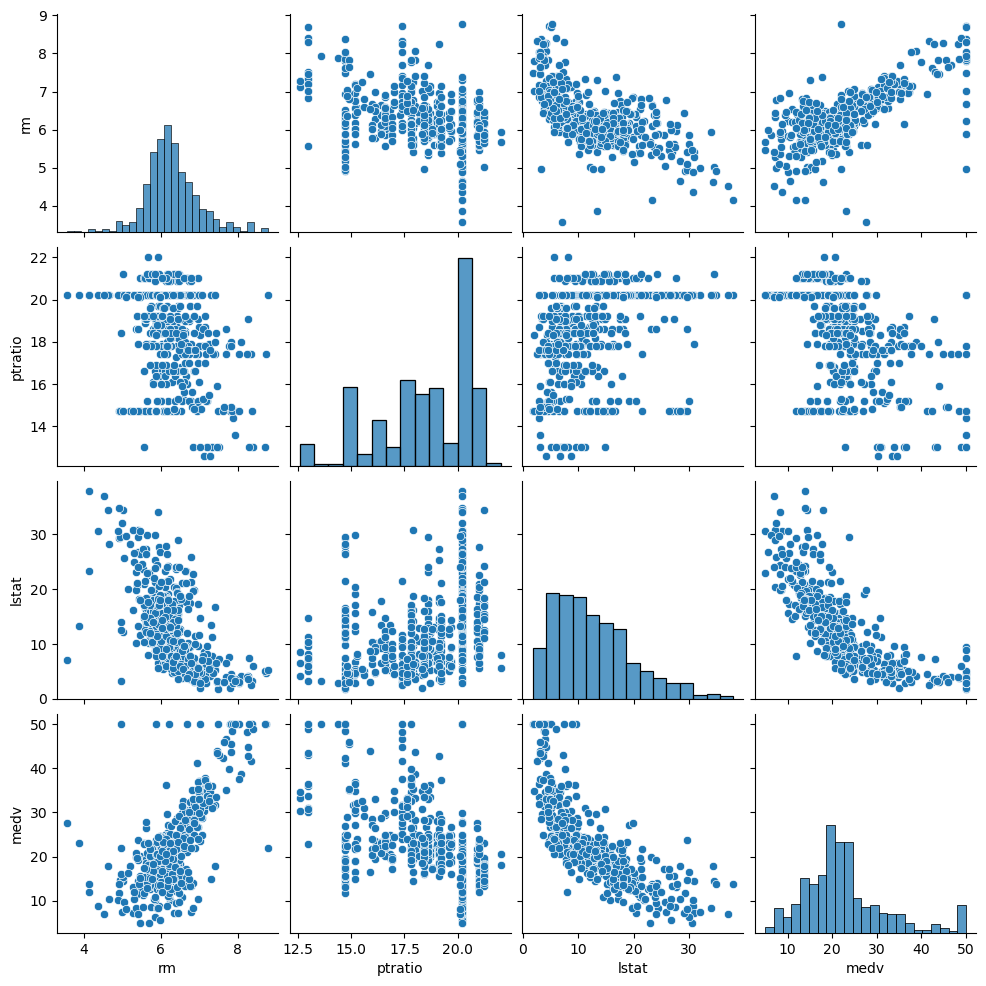

In [30]:
sns.pairplot(correlated_data)
plt.show()

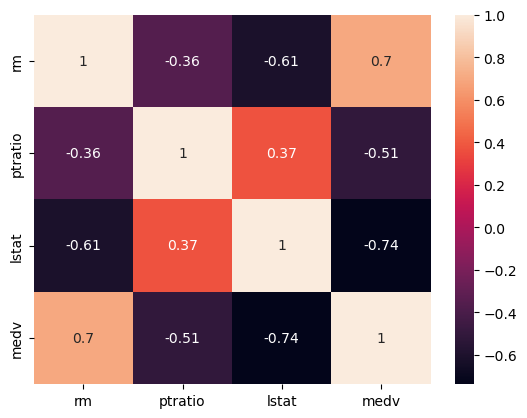

In [31]:
sns.heatmap(correlated_data.corr(),annot=True)
plt.show()

In [32]:
x = correlated_data.drop(columns='medv',axis=1)
y = correlated_data['medv']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape)

(404, 3) (404,)


In [34]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_predict = model.predict(x_test)

In [36]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
print("The R2 square is ",score)
print("The Mean Absolute error is ", mae)
print("The Mean Squared error is ",mse)

The R2 square is  0.6302528487272828
The Mean Absolute error is  3.332538078324096
The Mean Squared error is  27.114957415580573


In [37]:
import pickle
with open('boston_model','wb') as f:
    pickle.dump(model,f)

In [ ]:
from flask import Flask
from flask import request
from flask import render_template 
import joblib
app = Flask(__name__)

model = joblib.load('boston_model')
@app.route('/')
def hello(name=None):
    return render_template('index.html',name=name)


@app.route('/results', methods =["GET", "POST"])
def get_value():
    if request.method == "POST":
        rm = float(request.form.get('rm'))
        pt = float(request.form.get('pt'))
        lstat = float(request.form.get('lstat'))
        predict_value = model.predict([[rm,pt,lstat]])
        print(predict_value)
        
    return render_template('results.html',prediction=predict_value)

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [10/Dec/2023 11:55:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2023 11:55:07] "POST /results HTTP/1.1" 200 -


[30.93251583]


127.0.0.1 - - [10/Dec/2023 11:55:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Dec/2023 11:55:30] "POST /results HTTP/1.1" 200 -


[30.93251583]
